## Desciption

This model is fairly simple, using the same architecture as CNN_1_3, which we found to be the best. It does not include augmented data, just takes the data from La Fleur's supplemental materials including:
 - La Fleur et al (and De Novo Designs)
 - Urtecho et al
 - Hossain et al
 - Yu et al
 - Lagator (36N, Pl, and Pr)
 - Anderson Series

We onehot encode each basepair and pad the whole sequence. Because we use a CNN which is designed to identify "features," the input promoter can be any length (with padding) and the model will be able to accurately predict the expression.

In [1]:
import CNN_5_0 as parent

In [2]:
name = 'CNN_5_2'

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('../Data/combined/LaFleur_supp.csv')
df['Relatibe Observed log(TX/Txref)'] = MinMaxScaler().fit_transform(df[['Observed log(TX/Txref)']].abs())
df = df[df['Relatibe Observed log(TX/Txref)'] > 0.5]
X = df[['Promoter Sequence']].astype(str).agg(''.join, axis=1)
y = df['Relatibe Observed log(TX/Txref)'].values

X, max_length = parent.preprocess_sequences(X)

In [4]:
X.shape

(1663, 78, 4)

In [5]:
X_train, X_test, y_train, y_test = parent.train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = parent.build_cnn_model(X.shape[1:])
history = parent.train_model(model, X_train, y_train, X_test, y_test)
loss = parent.evaluate_model(model, X_test, y_test)
parent.save_model(model, name)

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 0.0518 - val_loss: 0.0066
Epoch 2/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0060 - val_loss: 0.0061
Epoch 3/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0052 - val_loss: 0.0054
Epoch 4/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045 - val_loss: 0.0054
Epoch 5/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035 - val_loss: 0.0054
Epoch 6/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033 - val_loss: 0.0062
Epoch 7/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - val_loss: 0.0055
Epoch 8/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 - val_loss: 0.0055
Epoch 9/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023 - val_loss: 0.0056
Epoch 10/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019 - val_loss: 0.0057
Epoch 11/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018 - val_loss: 0.0072
Epoch 12/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


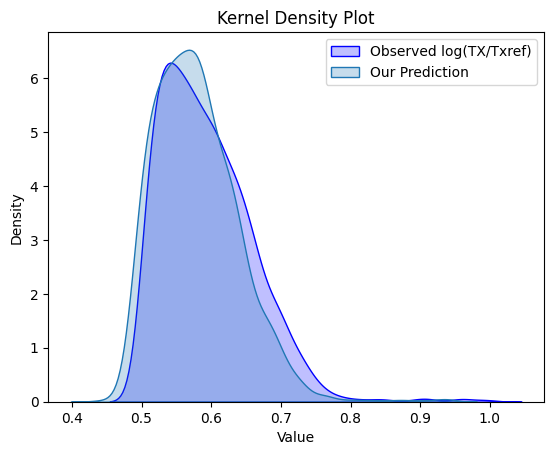

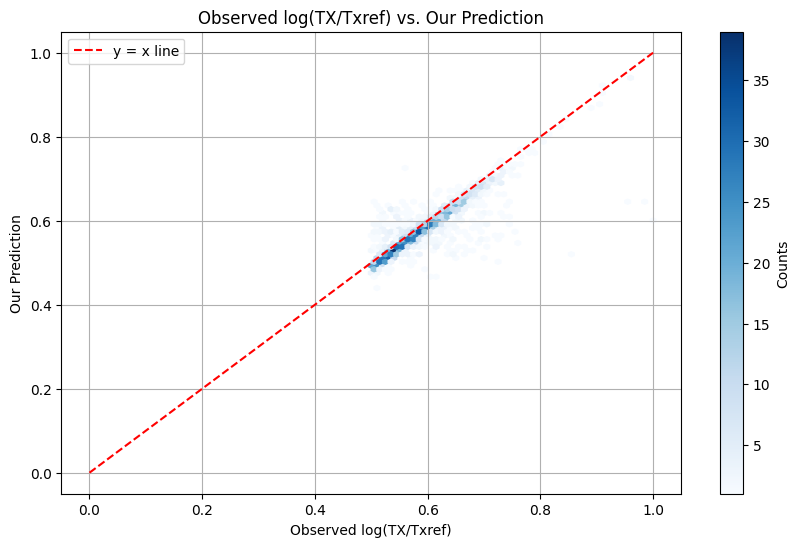

In [7]:
predicted = parent.load_and_predict(name, X)
observed = y

parent.plot_kde(observed, predicted)
# parent.plot_scatter(observed, parent.ravel(predicted))
parent.plot_hexbin(observed, parent.ravel(predicted))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


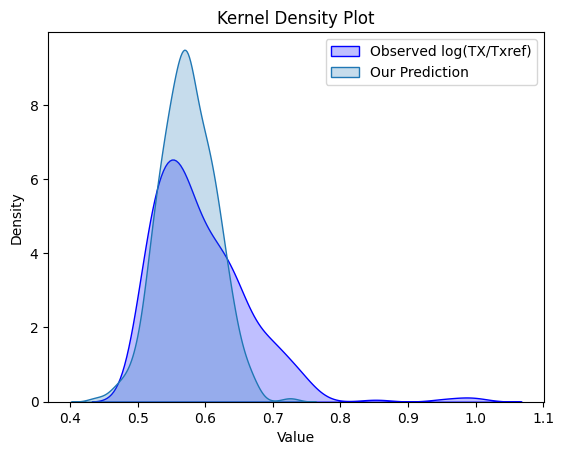

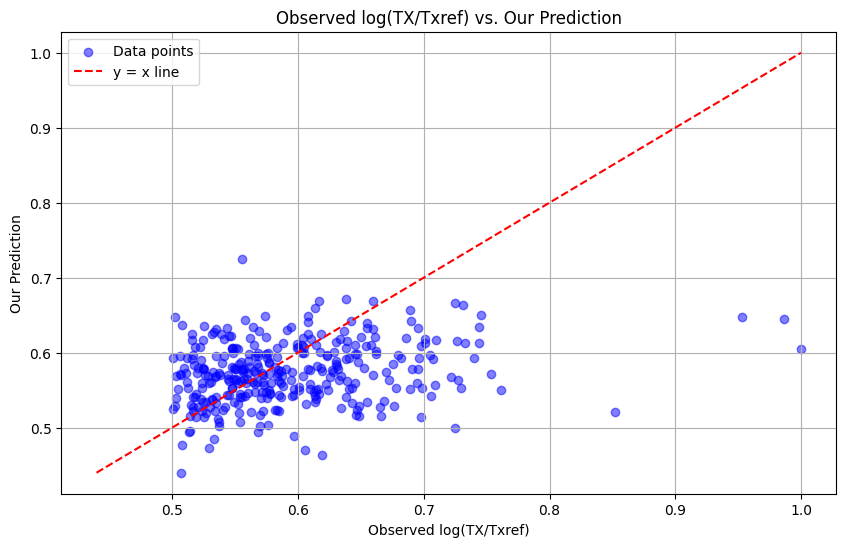

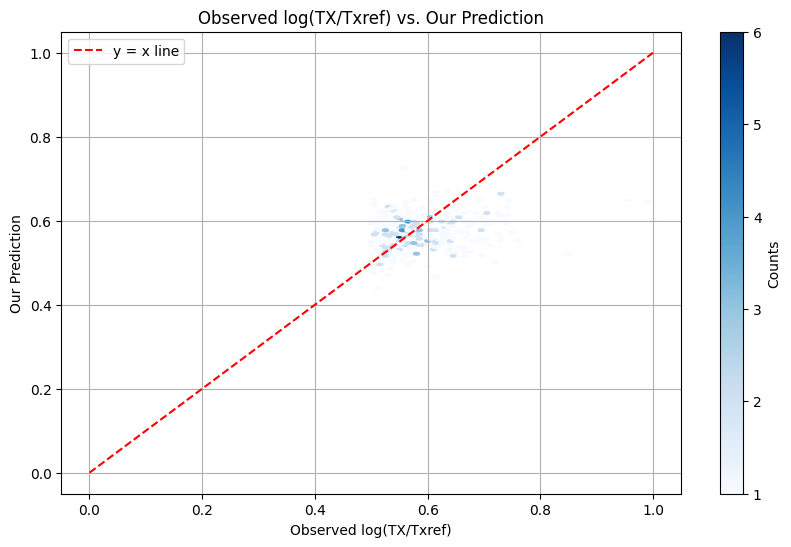

In [8]:
predicted = parent.load_and_predict(name, X_test)
observed = y_test

parent.plot_kde(observed, predicted)
parent.plot_scatter(observed, parent.ravel(predicted))
parent.plot_hexbin(observed, parent.ravel(predicted))

In [9]:
# Load, predict, and evaluate the best model
y_pred = parent.load_and_predict(name, X_test)
mse, rmse, mae, r2 = parent.calc_metrics(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2: ', r2)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
MSE:  0.005898270543113869
RMSE:  0.07680019884814016
MAE:  0.05540475482465211
R2:  -0.1254236854247186


In [10]:
from keras.models import Sequential, load_model

model = load_model('../Models/' + name + '.keras')

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 75, 64)         │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 37, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 34, 64)         │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 17, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1088)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        69,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261,893 (1023.02 KB)

 Trainable params: 87,297 (341.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 174,596 (682.02 KB)

In [12]:
model.save('../Models/' + name + '.hdf5')